#All the answers are included in this colab file itself with the codes

# Codes given

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

## Define Python function to calculate objective
def func_1(x):

    a = np.array([0.3, 0.6, 0.2])
    b = np.array([5, 26, 3])
    c = np.array([40, 1, 10])

    # Intermediates. Recall Python indicies start at 0
    u = x[0] - 0.8
    s = np.sqrt(1-u)
    s2 = np.sqrt(1+u)
    v = x[1] -(a[0] + a[1]*u**2*s-a[2]*u)
    alpha = -b[0] + b[1]*u**2*s2+ b[2]*u # September 5, 2018: changed 's' to 's2'
    beta = c[0]*v**2*(1-c[1]*v)/(1+c[2]*u**2)



    return alpha*np.exp(-beta)

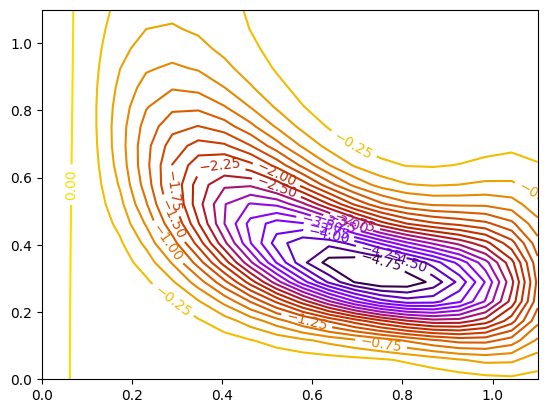

In [123]:
x = np.linspace(0, 1.1, 20)
y = np.linspace(0, 1.1, 20)

z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = func_1([x[i], y[j]])

contours=plt.contour(x, y, z, 20, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.show()

In [124]:
## Calculate gradient with central finite difference
def grad_central(x,f,eps1):
    n = len(x)
    grad = np.zeros(n)

    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps1

        # Finite difference formula
        f_plus = f(x + e)
        f_minus = f(x - e)

        grad[i] = (f_plus - f_minus)/(2*eps1)

    return grad

## Calculate hessian using central finite difference and my_hes_approx
def hes_central(x,grad,eps2):

    n = len(x)
    H = np.zeros([n,n])

    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps2

        # Evaluate gradient twice
        grad_plus = grad(x + e)
        grad_minus = grad(x - e)

        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps2)

    return H

def check_nan(A):
    return np.sum(np.isnan(A))

## Analyze Hessian.
def act_hes(B):
    print(B,"\n")

    if not check_nan(B):
        # Calculate eigenvalues
        l = linalg.eigvals(B)
        print("Eigenvalues: ",l,"\n")

In [125]:
def Newton_Pure(x0,comp_f,comp_grad,comp_hes,eps1,eps2,max_iter=250):

    # assign outputs as empty lists
    x = []
    f = []
    p = []

    # Store starting point
    x.append(x0)
    k = 0

    flag = True

    print("Iter. \tf(x) \t\t||grad(x)|| \t||p|| \t\tmin(lambda)")

    while flag:
        # Evaluate f(x) at current iteration
        f.append(comp_f(x[k]))

        # Evaluate gradient
        grad = comp_grad(x[k])

        if(check_nan(grad)):
            print("WARNING: gradiant calculation returned NaN")
            break

        # Evaluate Hessian
        hes = comp_hes(x[k])

        if(check_nan(hes)):
            print("WARNING: Hessian calculation returned NaN")
            break

        # Check if singular via condition number
        c = np.linalg.cond(hes)
        if c > 1E12:
            flag = False
            print("Warning: Hessian is near singular.")

        else:
            # Calculate step
            p.append(linalg.solve(hes,-grad))

            # Take step. x[k+1] = x[k] + p[k]
            x.append(x[k] + p[k])

            # Calculate norms
            norm_p = linalg.norm(p[k])
            norm_g = linalg.norm(grad)

            # Calculate eigenvalues (for display only)
            ev = np.real(linalg.eigvals(hes))

            # print("k = ",k,"\t"f[k],"\t",norm_g,"\t",norm_p)
            print(k,'  \t{0: 1.4e} \t{1:1.4e} \t{2:1.4e} \t{3: 1.4e}'.format(f[k],norm_g,norm_p,np.min(ev)))

            # Check convergence criteria
            flag = (norm_p > eps1) and (norm_g > eps2)

            # Update iteration counter
            k = k + 1

        if k > max_iter:
            flag = False
            print("Maximum number of iterations.")
    print("Done.")
    print("x* = ",x[-1])

    return x,f,p

In [126]:
## Test this code on the above given problem

# Specify convergence criteria
eps1 = 1E-8
eps2 = 1E-4

# Create a Lambda  function for gradient calculation
comp_grad = lambda x : grad_central(x,func_1,1E-6)

# Create a Lambda function for Hessian calculation
comp_hes = lambda x : hes_central(x,comp_grad,1E-6)

#....................................................................................................................................
# Recall that the Newton method does well for points close to the optimal solution.Accordingly specify starting point .
x0 = np.array([1.7,0.3])

# Call optimization routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,comp_hes,eps1,eps2);

# Actual Hessian
print("Hessian at x*= ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	 2.6650e+01 	7.1615e+01 	1.4062e+00 	-2.8886e+02
1   	-1.6738e-01 	1.4974e+00 	3.7777e-01 	-1.3054e+01
2   	-2.3730e-02 	1.9469e-01 	7.1745e-02 	-2.9434e+00
3   	-1.5143e-02 	6.3620e-02 	5.1540e-02 	-1.7639e+00
4   	-1.3356e-02 	8.0249e-03 	8.0475e-03 	-1.5579e+00
5   	-1.3324e-02 	6.1570e-05 	5.0780e-05 	-1.5565e+00
Done.
x* =  [0.80557694 0.96556989]
Hessian at x*= 
[[-1.47003937 -0.20602227]
 [-0.20602227 -1.06562545]] 

Eigenvalues:  [-1.55650667+0.j -0.97915815+0.j] 



# **Exercise 1**

Run the program for other starting points and decide if Pure Newton search is a good method for this problem.Why do you think Newton method fails for this problem?



###code

In [127]:
## Do the same with a different initial point.
x0 = np.array([1, 0.5])

# Call the Newton  routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,comp_hes,eps1,eps2);

# Actual Hessian
print("Hessian at x* = ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	-1.1226e+00 	9.5731e+00 	1.3415e-01 	-7.2252e+01
1   	-3.7785e-01 	3.3652e+00 	1.1713e-01 	-2.7965e+01
2   	-1.5207e-01 	1.2696e+00 	1.1264e-01 	-1.0021e+01
3   	-8.2078e-02 	4.8931e-01 	9.4696e-02 	-3.8544e+00
4   	-6.6590e-02 	1.5247e-01 	1.9901e-02 	-2.7999e+00
5   	-6.6956e-02 	1.5903e-02 	1.7322e-03 	-3.0320e+00
6   	-6.6964e-02 	2.0630e-04 	1.7720e-05 	-3.0340e+00
7   	-6.6964e-02 	3.6909e-08 	3.1486e-09 	-3.0342e+00
Done.
x* =  [1.07689587 0.95040621]
Hessian at x* = 
[[11.75045825  0.16828899]
 [ 0.16828899 -3.03225153]] 

Eigenvalues:  [11.75237383+0.j -3.03416712+0.j] 



###Answer;
 ***We can see that, one eigen value is positive while the other one being negative. Hence the Hessian matrix is not positive definite.Its indefinite.Minimization with Pure Newton method is succesful only if there is a positive definite Hessian. Therefore, Pure Newton search fails for this problem.***

#**Exercise 2**

Replace the Hessian of the function with the identity matrix and test the algorithm.Write down your observations.



###code:

In [128]:
def Id_hes(x):
    return 50*np.eye(len(x))

In [129]:
# Specify starting point
x0 = np.array([0.9, 0.3])

# Create a Lambda (anonymous) function for gradient calculation
comp_grad = lambda x : grad_central(x,func_1,1E-6);

# Call optimization routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,Id_hes,eps1,eps2,max_iter=25);

# Actual Hessian
print("Hessian at x* = ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	-4.3949e+00 	9.9226e+00 	1.9845e-01 	 5.0000e+01
1   	-3.1017e+00 	3.0416e+01 	6.0832e-01 	 5.0000e+01
2   	-3.4219e-02 	3.3383e-01 	6.6766e-03 	 5.0000e+01
3   	-3.6551e-02 	3.6494e-01 	7.2988e-03 	 5.0000e+01
4   	-3.9348e-02 	4.0216e-01 	8.0432e-03 	 5.0000e+01
5   	-4.2762e-02 	4.4744e-01 	8.9488e-03 	 5.0000e+01
6   	-4.7012e-02 	5.0363e-01 	1.0073e-02 	 5.0000e+01
7   	-5.2437e-02 	5.7506e-01 	1.1501e-02 	 5.0000e+01
8   	-5.9576e-02 	6.6858e-01 	1.3372e-02 	 5.0000e+01
9   	-6.9342e-02 	7.9565e-01 	1.5913e-02 	 5.0000e+01
10   	-8.3398e-02 	9.7676e-01 	1.9535e-02 	 5.0000e+01
11   	-1.0506e-01 	1.2519e+00 	2.5038e-02 	 5.0000e+01
12   	-1.4185e-01 	1.7083e+00 	3.4166e-02 	 5.0000e+01
13   	-2.1402e-01 	2.5682e+00 	5.1365e-02 	 5.0000e+01
14   	-3.9235e-01 	4.5293e+00 	9.0586e-02 	 5.0000e+01
15   	-1.0397e+00 	1.0295e+01 	2.0589e-01 	 5.0000e+01
16   	-3.9079e+00 	1.2683e+01 	2.5367e-01 	 5.0000e+01
17   	-2.4319e+00 	2.9530e+0

###Answer:
***both eigen values now have become negative. Hence, the Hessian is now negative definite. Therefore, Newton method fails again.***

#**Exercise 3**
Does the Levenberg Marquadt correction is better in finding the minimum ? Justify your answer.



### code

In [130]:
#Following code implements Levenberg-Marquadt correction to the Hessian.

def Leven_hes(x,grad,eps2,eps3):

    # Estimate Hessian with finite difference
    hes = hes_central(x,grad,eps2)

    # Calculate eigenvalues
    l, V = linalg.eig(hes)
    smallest_eigv = np.min(np.real(l))

    # Calculate Levenberg-Marquardt modification
    delta = 0
    if(smallest_eigv - eps3 < 0):
        delta = -smallest_eigv + eps3



    # Adjust hessian with Levenberg-Marquardt Correction
    return V.dot(np.diag(np.real(l)) + delta*np.eye(len(x))).dot(V.T)

In [131]:
# Specify starting point
x0 = np.array([1, .3])

# Create a Lambda (anonymous) function for Hessian calculation
comp_hes = lambda x : Leven_hes(x,comp_grad,1E-6,1E-3)

# Call optimization routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,comp_hes,eps1,eps2);

# Actual Hessian
print("Hessian at x*= ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	-3.2295e+00 	1.5005e+01 	2.5673e-01 	 5.8444e+01
1   	-4.2079e+00 	2.4956e+01 	9.5064e-02 	 5.3081e+01
2   	-4.9161e+00 	1.1487e+01 	3.6621e-02 	 2.7834e+01
3   	-5.0856e+00 	1.5759e+00 	7.1264e-03 	 4.4380e+01
4   	-5.0893e+00 	9.9492e-03 	1.4925e-04 	 4.3408e+01
5   	-5.0893e+00 	4.9532e-06 	1.1837e-08 	 4.3417e+01
Done.
x* =  [0.73950546 0.3143601 ]
Hessian at x*= 
[[ 77.01150828 108.33400843]
 [108.33400843 392.76693009]] 

Eigenvalues:  [ 43.41695231+0.j 426.36148606+0.j] 



### Answer:
***from the results, both the eigenvalues now have become positive. Hence the Hessian is positive definite. Therefore we can state that Levenberg Marquadt correction is better in finding the minimum.***

#**Exersice 4**

Do the exercises 1-3 for the function (x1)^4+x1x2+(1+x2)2
 starting at initial point  x0=[0,0]



### initial codes

In [132]:

## Define Python function to calculate objective
def func_1(x):
    f = x[0]**4 + x[0]*x[1] + (1 + x[1])**2
    return f


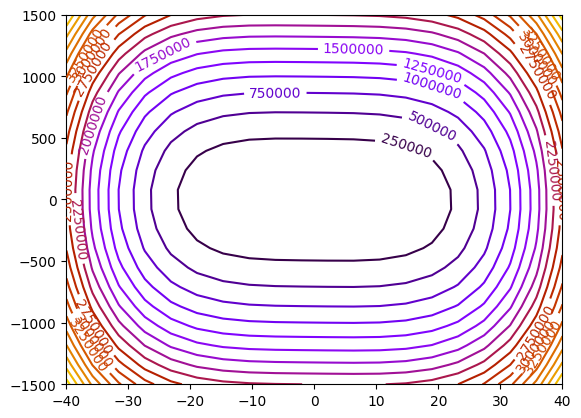

In [133]:
x = np.linspace(-40, 40, 20)
y = np.linspace(-1500, 1500.1, 20)

z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = func_1([x[i], y[j]])

contours=plt.contour(x, y, z, 20, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.show()

##**part1**

write the observations

#### code

In [134]:
## Test this code on the above given problem

# Specify convergence criteria
eps1 = 1E-8
eps2 = 1E-4

# Create a Lambda  function for gradient calculation
comp_grad = lambda x : grad_central(x,func_1,1E-6)

# Create a Lambda function for Hessian calculation
comp_hes = lambda x : hes_central(x,comp_grad,1E-6)
#..............................................................................................................................
# Recall that the Newton method does well for points close to the optimal solution.Accordingly specify starting point .
x0 = np.array([0,0])

# Call optimization routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,comp_hes,eps1,eps2);

# Actual Hessian
print("Hessian at x*= ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	 1.0000e+00 	2.0000e+00 	1.9999e+00 	-4.1423e-01
1   	 1.6998e+01 	3.1997e+01 	7.5329e-01 	 1.9776e+00
2   	 3.9803e+00 	9.6681e+00 	5.2448e-01 	 1.9478e+00
3   	 1.2131e+00 	3.0900e+00 	4.1544e-01 	 1.8564e+00
4   	 4.8212e-01 	1.2150e+00 	5.8341e-01 	 1.3318e+00
5   	-3.6643e-02 	1.0180e+00 	2.3506e+00 	-4.0072e-01
6   	 1.9224e+01 	3.5249e+01 	7.7685e-01 	 1.9799e+00
7   	 4.4376e+00 	1.0630e+01 	5.3855e-01 	 1.9515e+00
8   	 1.3181e+00 	3.3714e+00 	4.1899e-01 	 1.8688e+00
9   	 5.1889e-01 	1.2886e+00 	5.3728e-01 	 1.4293e+00
10   	 3.4028e-02 	9.8299e-01 	2.2620e+00 	-4.0216e-01
11   	 1.8920e+01 	3.4812e+01 	7.7384e-01 	 1.9805e+00
12   	 4.3753e+00 	1.0500e+01 	5.3663e-01 	 1.9510e+00
13   	 1.3039e+00 	3.3335e+00 	4.1844e-01 	 1.8675e+00
14   	 5.1406e-01 	1.2785e+00 	5.4252e-01 	 1.4177e+00
15   	 2.5717e-02 	9.8713e-01 	2.2434e+00 	-4.0735e-01
16   	 1.8062e+01 	3.3564e+01 	7.6455e-01 	 1.9801e+00
17   	 4.1995e+00 	1.0132e+0

#### ***Observation:Results show that the maximum number of iterations has exceeded. The f(x) value has varied a lot, meaning it has never converged. Therefore, Pure Newtons method is not a good method here. However, this may have happened due to few reasons. They are;***

- step size may have been too large.
- Initial point may have been very close. Hence, owing to step size being very large, it could have oscillated away near the minimum.


#### Do the same with a different initial point.

In [135]:
## Do the same with a different initial point.
x0 = np.array([1, 0.5])

# Call the Newton  routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,comp_hes,eps1,eps2);

# Actual Hessian
print("Hessian at x* = ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	 3.7500e+00 	6.0208e+00 	1.9035e+00 	 1.9013e+00
1   	-5.6063e-01 	5.2595e-01 	8.5701e-02 	 1.8191e+00
2   	-5.8218e-01 	5.3518e-02 	1.0923e-02 	 1.7627e+00
3   	-5.8245e-01 	8.0441e-04 	1.6917e-04 	 1.7537e+00
4   	-5.8245e-01 	1.9456e-07 	3.9621e-08 	 1.7536e+00
Done.
x* =  [ 0.69588439 -1.34794219]
Hessian at x* = 
[[5.81107384 0.99997788]
 [0.99997788 1.99998351]] 

Eigenvalues:  [6.05751802+0.j 1.75353933+0.j] 



#### ***taking [1, 0.5] gives the solution nicely! too closer initial point is the reson for above messed observations!  minimum point for the function is obtained with positive definite Hessian.***

##**part 2**

Replace the Hessian of the function with the identity matrix and test the algorithm.Write down your observations.


####code

In [136]:
#Replace the Hessian of the function with the identity matrix
def Id_hes(x):
    return 50*np.eye(len(x))

In [137]:
# Specify starting point
x0 = np.array([0, 0])

# Create a Lambda (anonymous) function for gradient calculation
comp_grad = lambda x : grad_central(x,func_1,1E-6);

# Call optimization routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,Id_hes,eps1,eps2,max_iter=25);

# Actual Hessian
print("Hessian at x* = ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	 1.0000e+00 	2.0000e+00 	4.0000e-02 	 5.0000e+01
1   	 9.2160e-01 	1.9204e+00 	3.8408e-02 	 5.0000e+01
2   	 8.4928e-01 	1.8457e+00 	3.6913e-02 	 5.0000e+01
3   	 7.8246e-01 	1.7756e+00 	3.5511e-02 	 5.0000e+01
4   	 7.2058e-01 	1.7099e+00 	3.4198e-02 	 5.0000e+01
5   	 6.6316e-01 	1.6485e+00 	3.2970e-02 	 5.0000e+01
6   	 6.0976e-01 	1.5912e+00 	3.1825e-02 	 5.0000e+01
7   	 5.5998e-01 	1.5379e+00 	3.0758e-02 	 5.0000e+01
8   	 5.1345e-01 	1.4883e+00 	2.9767e-02 	 5.0000e+01
9   	 4.6983e-01 	1.4424e+00 	2.8848e-02 	 5.0000e+01
10   	 4.2885e-01 	1.3999e+00 	2.7998e-02 	 5.0000e+01
11   	 3.9021e-01 	1.3607e+00 	2.7214e-02 	 5.0000e+01
12   	 3.5367e-01 	1.3247e+00 	2.6493e-02 	 5.0000e+01
13   	 3.1902e-01 	1.2916e+00 	2.5832e-02 	 5.0000e+01
14   	 2.8605e-01 	1.2614e+00 	2.5228e-02 	 5.0000e+01
15   	 2.5459e-01 	1.2339e+00 	2.4677e-02 	 5.0000e+01
16   	 2.2445e-01 	1.2088e+00 	2.4176e-02 	 5.0000e+01
17   	 1.9551e-01 	1.1861e+0

#### ***Results of eigen values are positive and negative hence, Hessian is indefinite. Therefore the Newtons method for minimization  does not work with the identity matrix here.***

##**part3**

Does the Levenberg Marquadt correction is better in finding the minimum ? Justify your answer.



#### code

In [138]:
def Leven_hes(x,grad,eps2,eps3):

    # Estimate Hessian with finite difference
    hes = hes_central(x,grad,eps2)

    # Calculate eigenvalues
    l, V = linalg.eig(hes)
    smallest_eigv = np.min(np.real(l))

    # Calculate Levenberg-Marquardt modification
    delta = 0
    if(smallest_eigv - eps3 < 0):
        delta = -smallest_eigv + eps3



    # Adjust hessian with Levenberg-Marquardt Correction
    return V.dot(np.diag(np.real(l)) + delta*np.eye(len(x))).dot(V.T)

In [139]:
# Specify starting point
x0 = np.array([0, 0])

# Create a Lambda (anonymous) function for Hessian calculation
comp_hes = lambda x : Leven_hes(x,comp_grad,1E-6,1E-3)

# Call optimization routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,comp_hes,eps1,eps2);

# Actual Hessian
print("Hessian at x*= ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	 1.0000e+00 	2.0000e+00 	7.6537e+02 	 1.0000e-03
1   	 2.4965e+11 	1.4127e+09 	1.2207e+05 	 1.0000e-03
2   	 8.8980e+10 	5.6781e+08 	7.4424e+01 	 3.8147e+06
3   	 5.4937e+10 	3.5777e+08 	3.5777e+11 	 1.0000e-03
4   	 1.6385e+46 	0.0000e+00 	0.0000e+00 	 1.0000e-03
Done.
x* =  [-3.57774803e+11 -1.22363602e+05]
Hessian at x*= 
[[0. 0.]
 [0. 0.]] 

Eigenvalues:  [0.+0.j 0.+0.j] 



#### ***Answer: both the eigenvalues now have become zero. This means Levenberg Marquadt correction has failed in finding the minimum. This could have occured due to the choice of insufficient modification factor.***


####-Let us try a larger modification factor to make the least negative eigenvalue to become positive.

-Initial modification factor was eps3 = 0.001,
let us now try eps3 = 0.05

In [140]:
# Specify starting point
x0 = np.array([0, 0])

# Create a Lambda (anonymous) function for Hessian calculation
comp_hes = lambda x : Leven_hes(x,comp_grad,1E-6,0.5)

# Call optimization routine
x,f,p = Newton_Pure(x0,func_1,comp_grad,comp_hes,eps1,eps2);

# Actual Hessian
print("Hessian at x*= ")
act_hes(hes_central(x[-1],comp_grad,1E-6))

Iter. 	f(x) 		||grad(x)|| 	||p|| 		min(lambda)
0   	 1.0000e+00 	2.0000e+00 	1.6283e+00 	 5.0000e-01
1   	 7.7532e-01 	5.9299e+00 	4.6769e-01 	 1.9351e+00
2   	-4.6816e-01 	1.3248e+00 	1.6668e-01 	 1.8669e+00
3   	-5.7814e-01 	2.2263e-01 	4.1566e-02 	 1.7873e+00
4   	-5.8243e-01 	1.1989e-02 	2.5059e-03 	 1.7557e+00
5   	-5.8245e-01 	4.2056e-05 	8.8632e-06 	 1.7535e+00
Done.
x* =  [ 0.69588439 -1.34794219]
Hessian at x*= 
[[5.81101833 0.99995012]
 [0.99995012 1.999928  ]] 

Eigenvalues:  [6.05744961+0.j 1.75349672+0.j] 




***After making the eps3 = 0.5 , the algorithm has converged to the minimum point similar to which was calculated earlier using the initail point as [1, 0.5].***

***Therefore, we can say Levenberg Marquadt correction has worked once the modification factor was recorrected to sufficeintly larger value.***

